<a href="https://colab.research.google.com/github/anshupandey/natural_language_processing/blob/master/Email_classification_newgroupdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [0]:
traindata = datasets.fetch_20newsgroups()
x = traindata.data
y = traindata.target
class_names = traindata.target_names
print(len(x))
print(len(y))

11314
11314


In [0]:
# we have data/emails belonging to 20 categories
class_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
print(x[1000])

From: dabl2@nlm.nih.gov (Don A.B. Lindbergh)
Subject: Diamond SS24X, Win 3.1, Mouse cursor
Organization: National Library of Medicine
Lines: 10


Anybody seen mouse cursor distortion running the Diamond 1024x768x256 driver?
Sorry, don't know the version of the driver (no indication in the menus) but it's a recently
delivered Gateway system.  Am going to try the latest drivers from Diamond BBS but wondered
if anyone else had seen this.

post or email

--Don Lindbergh
dabl2@lhc.nlm.nih.gov



In [0]:
print(y[10000])
print(class_names[y[10000]])

7
rec.autos


In [0]:
print(len(x))
print(len(y))

11314
11314


In [0]:
for i in range(len(x)):
  doc = x[i]
  doc = re.sub("[a-zA-Z0-9._]+@[a-zA-Z0-9._]+","",doc) # to remove all email ids
  doc = re.sub("[0-9]+","",doc) # removing tokens having numbers
  doc = re.sub("_","",doc)
  x[i] = doc

In [0]:
# Text Vectorization - Tfidf

tfidf = TfidfVectorizer(lowercase=True,stop_words="english",analyzer="word",min_df=15,max_df=0.95)
tfidf.fit(x)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.95, max_features=None,
                min_df=15, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
print(len(tfidf.get_feature_names()))

9799


In [0]:
print(tfidf.get_feature_names())

['aa', 'aaa', 'aaron', 'ab', 'abandon', 'abandoned', 'abc', 'abiding', 'abilities', 'ability', 'able', 'abolish', 'abolished', 'abort', 'abortion', 'abpsoft', 'abraham', 'abroad', 'abs', 'absence', 'absent', 'absolute', 'absolutely', 'absolutes', 'abstract', 'absurd', 'absurdities', 'absurdity', 'abu', 'abuse', 'abused', 'abuses', 'ac', 'acad', 'academia', 'academic', 'academy', 'accelerate', 'accelerated', 'acceleration', 'accelerator', 'accelerators', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessed', 'accessible', 'accessories', 'accident', 'accidental', 'accidentally', 'accidents', 'accommodate', 'accomodate', 'accompanied', 'accompanying', 'accomplish', 'accomplished', 'accord', 'accordance', 'according', 'account', 'accountable', 'accounting', 'accounts', 'accuracy', 'accurate', 'accurately', 'accusation', 'accusations', 'accuse', 'accused', 'ace', 'achieve', 'achieved', 'acid', 'acker', 'acknowledge', 'acknowledged', 'aclu', 'acm', 'a

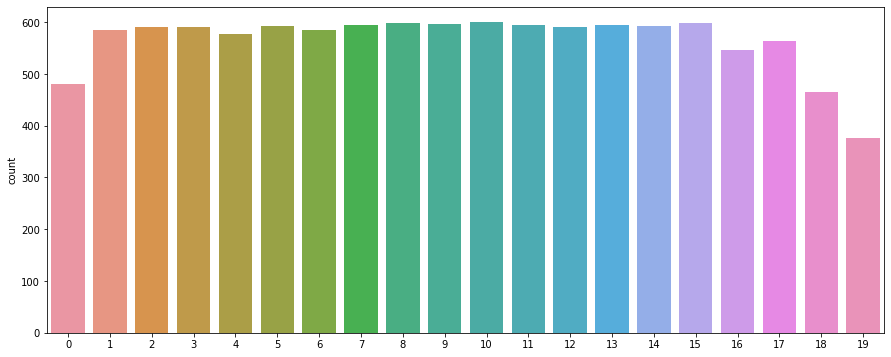

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.countplot(y)
#plt.xticks(class_names)
plt.show()

In [0]:
x2 = tfidf.transform(x).toarray()

In [0]:
print(x2.shape)

(11314, 9799)


In [0]:
# split data into train and validation set
from sklearn.model_selection import train_test_split
xtr,xvd,ytr,yvd = train_test_split(x2,y,test_size=0.2,random_state=5,stratify=y)

In [0]:
# bulding a classifier using Naive Bayes 

model = MultinomialNB()
# train the model 
model.fit(xtr,ytr)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# check accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
ypred = model.predict(xvd)
accuracy_score(ypred,yvd)

0.8616880247459126

In [0]:
import pandas as pd
pd.DataFrame(confusion_matrix(ypred,yvd))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
1,0,89,3,2,5,6,1,0,1,1,0,2,3,4,2,1,0,0,0,0
2,0,4,101,7,4,3,3,0,0,0,0,3,5,0,1,0,0,0,0,0
3,0,4,7,98,4,2,9,0,0,0,1,0,6,0,0,0,0,0,0,0
4,0,1,0,4,93,1,1,1,0,0,0,0,11,0,0,0,0,0,0,0
5,0,13,6,3,1,105,0,1,1,1,0,2,0,1,0,0,0,0,0,0
6,0,2,1,2,4,0,90,2,0,3,1,0,3,0,1,0,0,0,0,0
7,0,0,0,0,1,0,4,105,3,2,0,0,3,0,0,0,0,0,1,0
8,0,0,0,0,0,0,3,8,114,0,0,0,0,0,0,0,0,0,0,2
9,0,0,0,0,0,1,0,0,0,110,1,1,0,0,0,1,0,0,1,0


In [0]:
new_email = [""" Hi,
I purchased a laptop and it is having NVIDIA GTX GeForece 65x graphics card, bu the the graphics is not helping in
recognizing or processing high definition videos and playing games, do I need to have game cards or this graphics card can resolve
pixel issues.
regards
Anshu"""]
model.predict(tfidf.transform(new_email).toarray())

array([1])

In [0]:
class_names[1]

'comp.graphics'